# Career Foundry Exercise 6.2 - Exploring Relationships
#### Gabriel Pollicar, December 22 , 2023

### _________________________________________________________________

## Contents List:

### - Importing Libraries and Datasets

### - Correlation Heatmap
### - Scatterplot
### - PairPlot
### - Categorical Plots
### - Answering Questions

### - Exporting Datasets

### _________________________________________________________________


## Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy

## Importing Datasets

In [2]:
# Importing the realtor data 
# This dataset holds all initial columns remaining from the dataset at the end of Part I, 
path = r'C:\Users\polli\Career Foundry Python'
realtor_data = pd.read_csv(os.path.join(path, 'Exercise 6.1','02 Data', 'realtor-data_Cleaned.csv'))

In [3]:
realtor_data.shape

(73963, 11)

In [4]:
realtor_data.columns

Index(['Unnamed: 0', 'status', 'bed', 'bath', 'acre_lot', 'city', 'state',
       'zip_code', 'house_size', 'prev_sold_date', 'price'],
      dtype='object')

In [5]:
realtor_data = realtor_data.drop('Unnamed: 0', axis=1)

In [6]:
realtor_data.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

In [7]:
# I will be comparing price as the main attribute and compare it to status, number of beds, baths, acre_lot, and house size


## Correlation Heat Map

In [8]:
sub_realtor = realtor_data[['bed', 'bath', 'acre_lot', 'house_size', 'price']]

In [9]:
sub_realtor.corr()

,bed,bath,acre_lot,house_size,price
bed,1.000000,0.679916,0.001366,0.175899,0.252909
bath,0.679916,1.000000,-0.003236,0.207329,0.444030
acre_lot,0.001366,-0.003236,1.000000,-0.000827,-0.004244
house_size,0.175899,0.207329,-0.000827,1.000000,0.145126
price,0.252909,0.444030,-0.004244,0.145126,1.000000


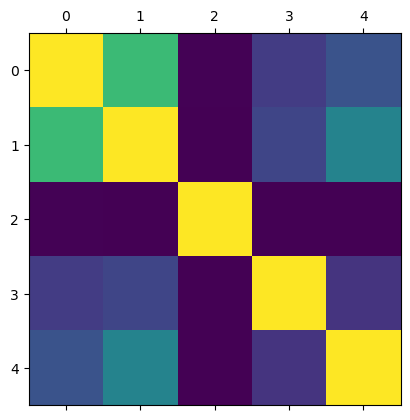

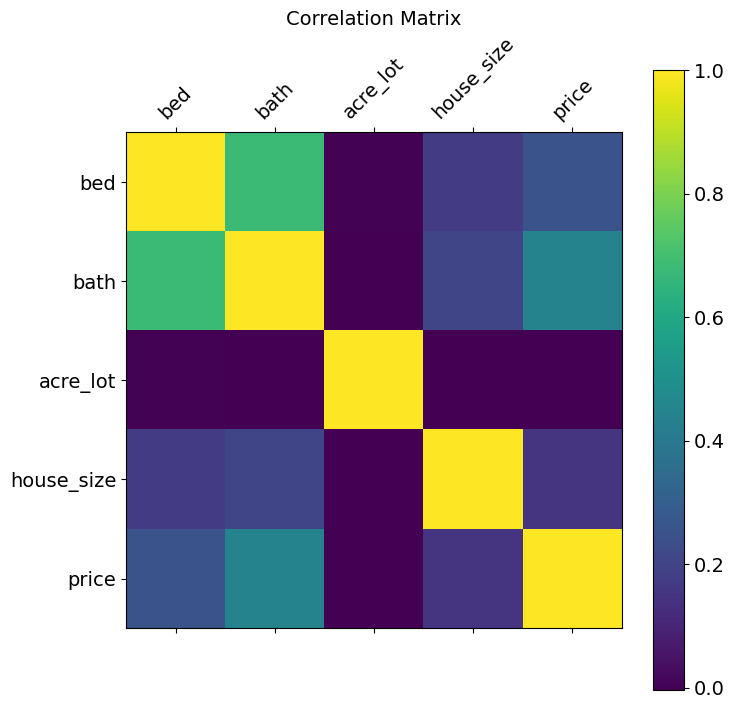

In [10]:
plt.matshow(sub_realtor.corr())
plt.show()

# With added Legend
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub_realtor.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub_realtor.shape[1]), sub_realtor.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub_realtor.shape[1]), sub_realtor.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

# Saves Image to 04 Analysis Folder 
plt.savefig(path + "/Exercise 6.2/04 Analysis/Correlation_matrix.png") 

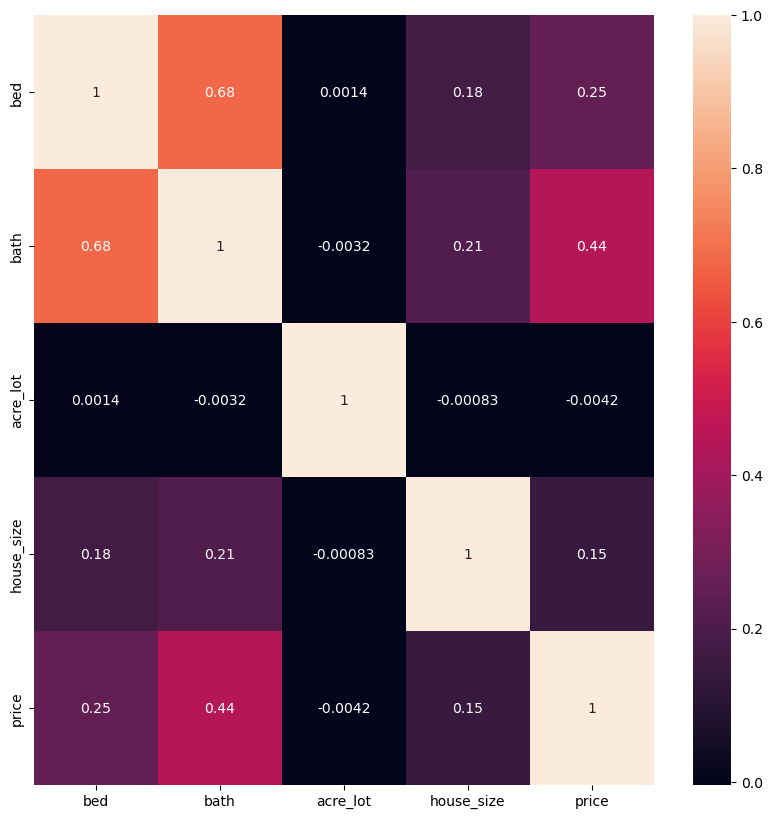

In [11]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub_realtor.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Observation: 
It seems that these values have somewhat low correlations to the price. The most correlated attributes seem to be the number
of beds and baths which would make sense logically, since the more bedrooms would correlate to more bathrooms in the property.
According to the legend, this correlation is highly correlated at 0.68. 

Another correlating value can be price and number of bathrooms. This seems to be near .44 which can be somewhat correlated. This can also make sense since most people will pay more for a larger home with more bedrooms and baths. 

House size does not seem to have a correlation with the price. According to the legend, price and house size has a .15 correlation. This may make sense considering some properties were sold in urban areas while others were sold in rural areas. 

In [12]:
subset = realtor_data[realtor_data['zip_code'] == 8757]

In [13]:
subsubset = subset[['bed', 'bath', 'acre_lot', 'house_size', 'price']]

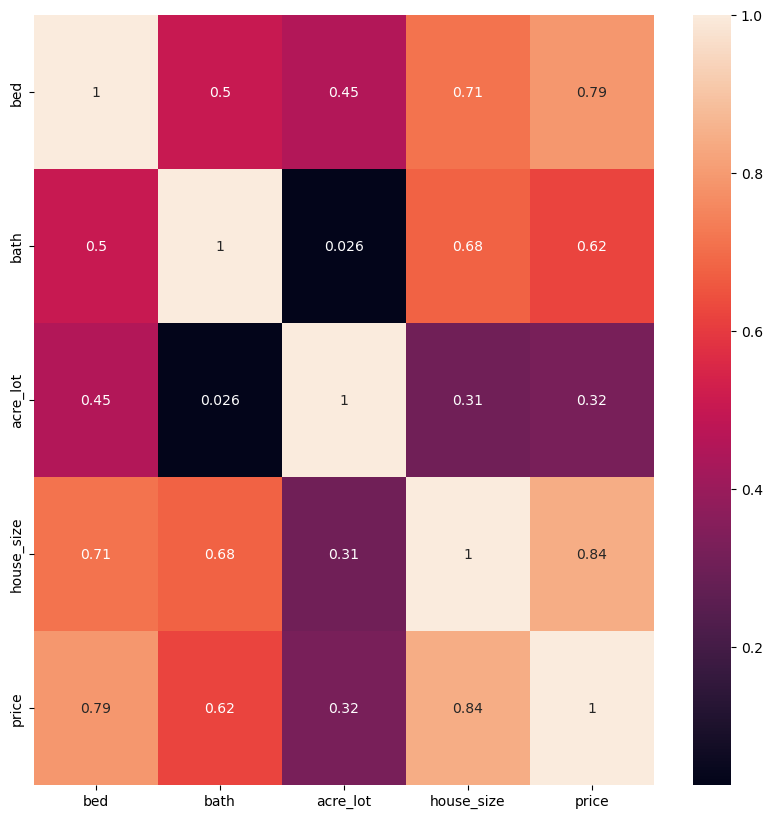

In [71]:
Jersey_sub = realtor_data[realtor_data['zip_code'] == 8757]
seed_value = 42
Jersey_small = Jersey_sub.sample(frac=0.8, random_state=seed_value)

Jerseysub_small = Jersey_small[['bed', 'bath', 'acre_lot', 'house_size', 'price']]
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(Jerseysub_small.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Observation: 
It seems that when subsetting the data to a specific zip code, certain attributes become more correlated. Here I subsetted the dataset to a specific zip code in New Jersey. Several attributes then became more correlated. Price became more correlated to number of beds, baths, and house_size. House size to listing price had a correlation of .84 when measuring from only 1 zip code in New Jersey. This is much higher than .15 when measuring all houses across the United States. 

I would conclude that some underlying variable exists with different zip codes that changes the price drastically. Most likely, this could be the many other variables that underly property value such as crime rate, distance to schools, amenities, services, neighborhood, and much more. By isolating the data in one zip code, we are able to see other correlations exist. 

## 4. Scatterplots

C:\Users\polli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


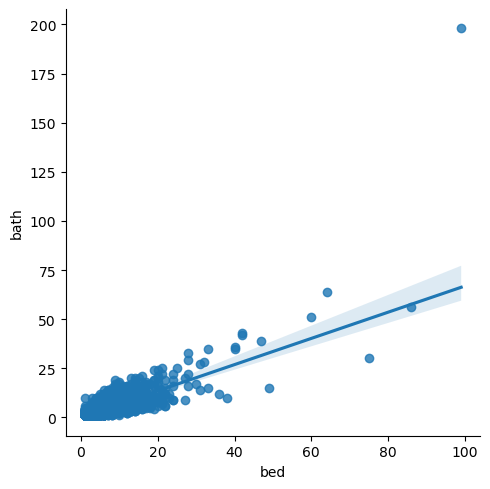

In [15]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

sns.lmplot(x = 'bed', y = 'bath', data = sub_realtor)

C:\Users\polli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


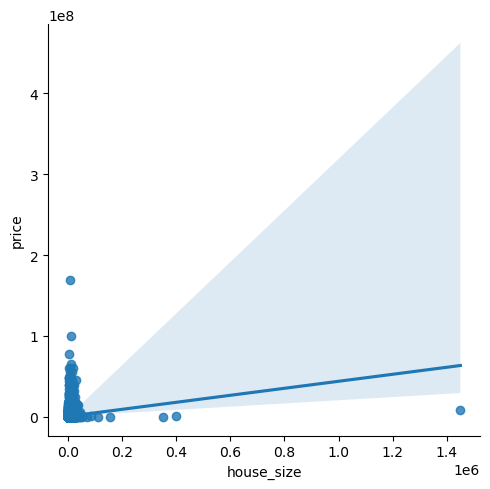

In [16]:
sns.lmplot(x = 'house_size', y = 'price', data = sub_realtor)

### Observation: 
Scatterplot for house size and price shows why correlation was low. Many houses sold in the dataset do not go above 1 acre. This makes sense consdiring many homes or listings can be apartments, studios, or townhouses which have relatively small acreage. However they might be near cities and have much higher prices. Beds and baths have a clear correlation shown in the first scatterplot with some outliers. 

## 5. Pair Plot

In [45]:
# Subsetting to smaller df to lower memory 
seed_value = 42
subset_sub_realtor = sub_realtor.sample(frac=0.1, random_state=seed_value)

In [46]:
# lower amount of columns to pair plot 

subset_sub_realtor1 = subset_sub_realtor[['bed', 'bath', 'house_size', 'price']]
subset_sub_realtor1.shape

(7396, 4)

C:\Users\polli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


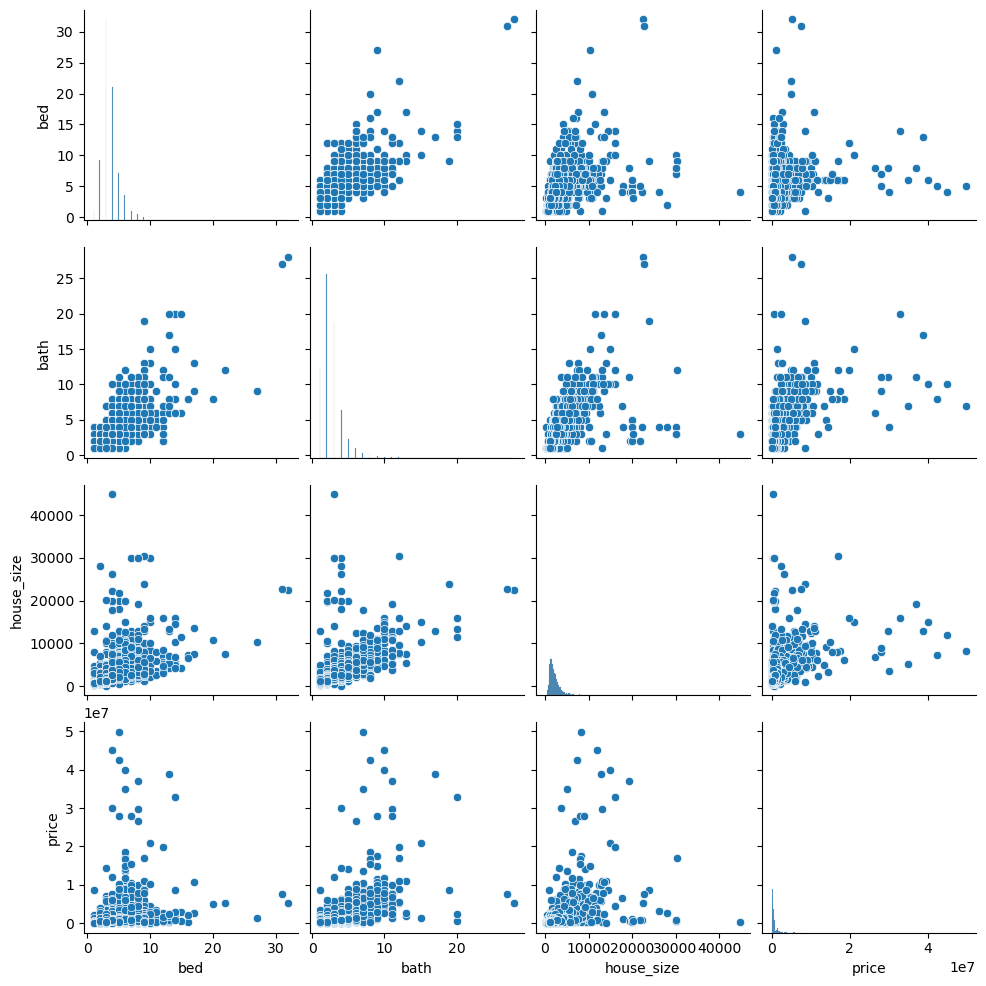

In [47]:
# Create a pair plot 

Pair_Plot = sns.pairplot(subset_sub_realtor1)

In [60]:
# Subsetting even further to isolate location, Subsetting to one specific zip code in New Jersey as an example

Jersey_sub = realtor_data[realtor_data['zip_code'] == 8757]


seed_value = 42
Jersey_small = Jersey_sub.sample(frac=0.5, random_state=seed_value)

Jerseysub_small = Jersey_small[['bed', 'bath', 'acre_lot', 'house_size', 'price']]

C:\Users\polli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


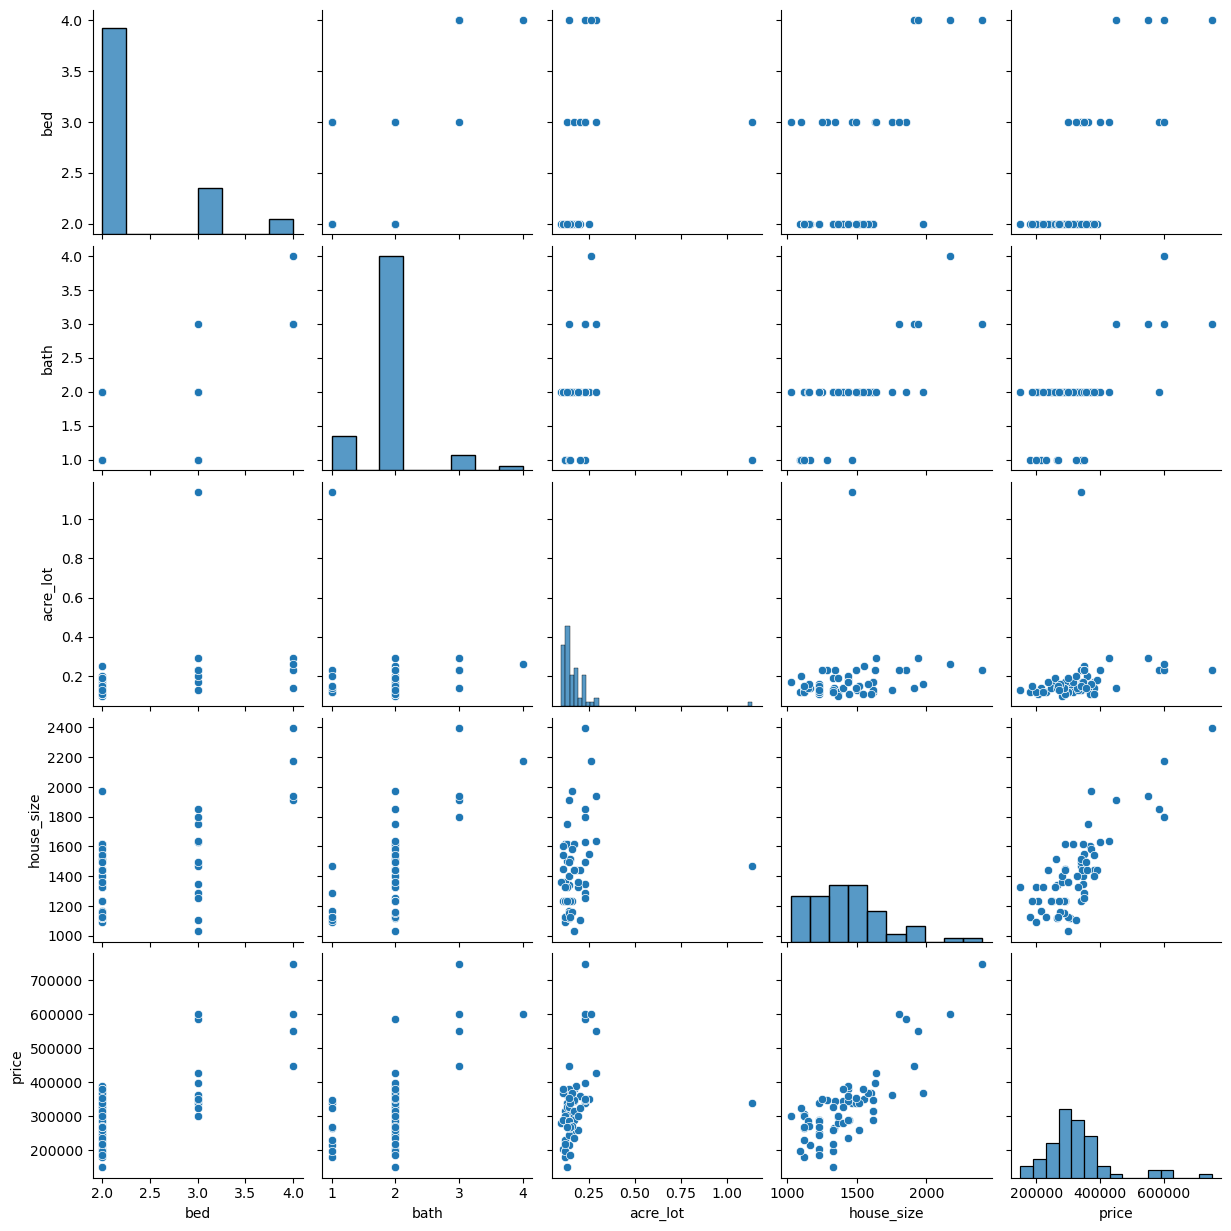

In [61]:
Pair_Plot = sns.pairplot(Jerseysub_small)

### Observation: 

Its much more clearer why certain attributes like house_size did not have high correlation to housing prices in the larger dataset. When using pair plots, house_size to price shows much less correlation due to many outliers on both axis. Some houses are sold with small floor plans for high prices, while some with larger sizes are sold for less. However, by subsetting to specific locations, its evident in the pair plot that variances decrease for the house_size attribute. 

## 6. Categorical Plots

In [52]:
sub = realtor_data[realtor_data['bed'] < 50]


<Axes: xlabel='bed', ylabel='Count'>

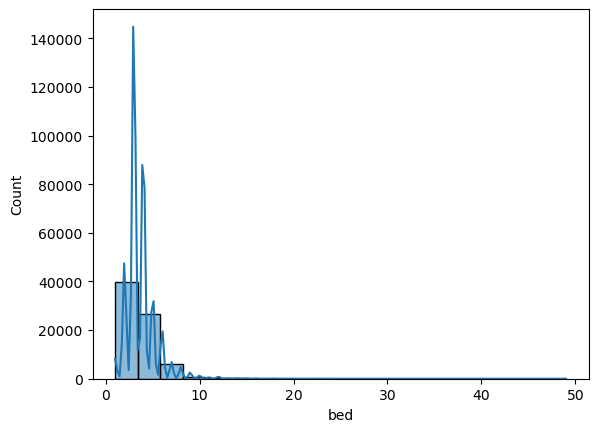

In [53]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(sub['bed'], bins = 20, kde = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Virgin Islands'),
  Text(1, 0, 'Massachusetts'),
  Text(2, 0, 'New York'),
  Text(3, 0, 'Connecticut'),
  Text(4, 0, 'Puerto Rico'),
  Text(5, 0, 'New Hampshire'),
  Text(6, 0, 'Rhode Island'),
  Text(7, 0, 'New Jersey'),
  Text(8, 0, 'Vermont'),
  Text(9, 0, 'Wyoming'),
  Text(10, 0, 'Maine'),
  Text(11, 0, 'Pennsylvania'),
  Text(12, 0, 'Delaware'),
  Text(13, 0, 'West Virginia')])

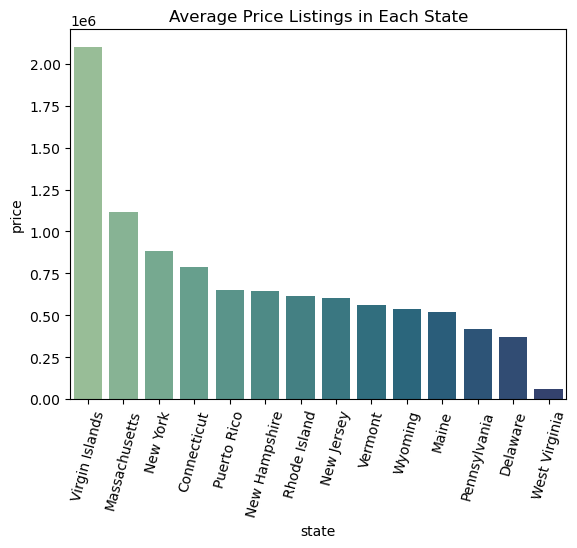

In [112]:
price_per_state = realtor_data.groupby('state')['price'].mean().sort_values(ascending = False).reset_index(drop = False)
sns.barplot(x ='state', y = 'price', data = price_per_state,
                 palette = 'crest')
plt.title("Average Price Listings in Each State")
plt.xticks(rotation = 75)

In [82]:
Jersey = realtor_data[realtor_data['state'] == 'New Jersey']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Puerto Rico'),
  Text(1, 0, 'New York'),
  Text(2, 0, 'New Jersey'),
  Text(3, 0, 'Connecticut'),
  Text(4, 0, 'Maine'),
  Text(5, 0, 'Vermont'),
  Text(6, 0, 'Rhode Island'),
  Text(7, 0, 'New Hampshire'),
  Text(8, 0, 'Massachusetts'),
  Text(9, 0, 'Delaware'),
  Text(10, 0, 'Pennsylvania'),
  Text(11, 0, 'Virgin Islands'),
  Text(12, 0, 'Wyoming'),
  Text(13, 0, 'West Virginia')])

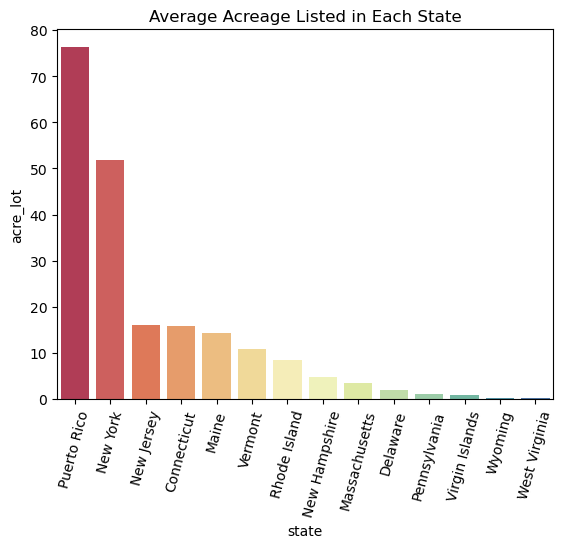

In [121]:
# Find State with the highest average acreage being sold per property in real estate

price_per_state = realtor_data.groupby('state')['acre_lot'].mean().sort_values(ascending = False).reset_index(drop = False)
sns.barplot(x ='state', y = 'acre_lot', data = price_per_state,
                 palette = 'Spectral')
plt.title("Average Acreage Listed in Each State")
plt.xticks(rotation = 75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Virgin Islands'),
  Text(1, 0, 'Puerto Rico'),
  Text(2, 0, 'Massachusetts'),
  Text(3, 0, 'New Jersey'),
  Text(4, 0, 'Vermont'),
  Text(5, 0, 'Connecticut'),
  Text(6, 0, 'New Hampshire'),
  Text(7, 0, 'New York'),
  Text(8, 0, 'Rhode Island'),
  Text(9, 0, 'Maine'),
  Text(10, 0, 'Delaware'),
  Text(11, 0, 'Wyoming'),
  Text(12, 0, 'Pennsylvania'),
  Text(13, 0, 'West Virginia')])

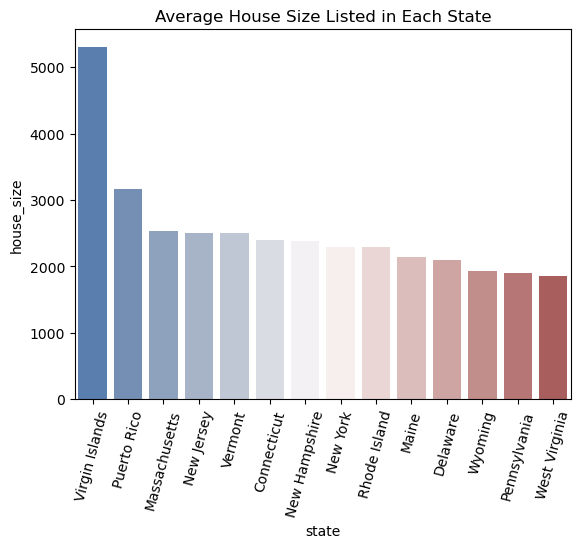

In [122]:
price_per_state = realtor_data.groupby('state')['house_size'].mean().sort_values(ascending = False).reset_index(drop = False)
sns.barplot(x ='state', y = 'house_size', data = price_per_state,
                 palette = 'vlag',)
plt.title("Average House Size Listed in Each State")
plt.xticks(rotation = 75)

In [120]:
realtor_data.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

## 7. Answering Questions about Data Relationships

### Previous Questions

**1. Do house attributes like the number of bedrooms and bathrooms show strong correlations with housing prices?**

When analyzing the entire dataset, it does not seem to have high correlation. However after further analysis, there are high correlations when comparing houses in the same zip code. For example, Subsetting data to only one specific zip code in New Jersey and measuring with a correlation matrix, showed that the correlation of bedrooms and bathrooms increased to .76 and .62 respectively. 

This is a high correlation compared to .25 and .44 which was what I got when earlier measuring correlation for all houses across the United States. It seems that correlation between bedrooms and bathrooms to housing prices exists but only locally. 

**2. How are housing prices correlated with location attributes such as state?**

Housing prices has a large variance according to state. New York, Virgin islands, and Massachussetts have much higher housing costs on average than other states such as West Virginia or Pennsylvania. 

**4. Are there specific regions or ZIP codes where housing prices tend to be higher or lower?**

Certain zip codes near large popular urban areas have much higher prices than rural areas. New York City zip codes such as near downtown areas tend to have much higher housing prices. 

**5. Is there a correlation between the total land area (acre_lot) and the living space (house_size) with housing prices?**

Acreage does not have much correlation to housing prices, even when location is isolated from the dataset by subsetting to speciifc zip codes. Acreage has a .32 correlation with housing price. However in local zip codes, house_size (floor space) has a much higher correlation (.82) with housing prices. 

**6. Do larger properties or homes tend to have higher listing or sold prices?**

Larger homes relative to the area tend to have higher listing prices, however, size has no correlation when comparing to the entire United States. This is because some houses are sold in rural areas with high floor space for cheaper than houses sold in dense urban areas with smaller floor plans. 





### Further Research Questions:

1. What are the external variables underlying the locations of real estate properties that could be added to predict the listing prices?<br> 
<br> 
2. Are there any variables in geography such as state latitude (warmer vs colder climates) that have an affect on real estate price?<br> 
<br> 
3. What affect do cities being closer to coastlines to near beaches, have on real estate prices?


### Hypotheses:

1. When isolating location into specific zip codes, Beds, baths, and floor space are variables that can help predict listing price.<br> 
<br> 

2. Cities closer to the coast and in warmer climates have higher listing price.<br> 
<br> 

3. Acreages do not have as much of an effect to house prices as other variables when houses are in high density urban population areas. <br> 
<br> 


## Exporting Dataset